In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
file_path = 'U.S._Chronic_Disease_Indicators__CDI___2023_Release_20250116.csv' 
df = pd.read_csv(file_path)
df.shape

/tmp/ipykernel_550976/3767808174.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(1185676, 34)

#### Filtering for Texas

In [3]:
filtered_df = df[df['LocationDesc'] == 'Texas']
filtered_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
89,2014,2014,TX,Texas,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,1460,1460.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ALC,ALC6_0,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
90,2015,2015,TX,Texas,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,2496,2496.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ALC,ALC6_0,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
91,2016,2016,TX,Texas,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,3880,3880.0,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
92,2019,2019,TX,Texas,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,1711,1711.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ALC,ALC6_0,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
170,2017,2017,TX,Texas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,"cases per 10,000",Age-adjusted Rate,NaN,NaN,-,No data available,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,AST,AST3_1,AGEADJRATE,GENDER,GENF,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185213,2019,2019,TX,Texas,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Age-adjusted Prevalence,37.8,37.8,NaN,NaN,24.4,53.4,Race/Ethnicity,"Other, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ART,ART2_1,AGEADJPREV,RACE,OTH,NaN,NaN,NaN,NaN
1185248,2019,2019,TX,Texas,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Age-adjusted Prevalence,35.4,35.4,NaN,NaN,26.6,45.3,Gender,Male,NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ART,ART2_1,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
1185433,2019,2019,TX,Texas,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Crude Prevalence,51.2,51.2,NaN,NaN,29.7,72.2,Race/Ethnicity,"Multiracial, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ART,ART2_1,CRDPREV,RACE,MRC,NaN,NaN,NaN,NaN
1185508,2017,2017,TX,Texas,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Age-adjusted Prevalence,64.5,64.5,NaN,NaN,56.2,72.0,Race/Ethnicity,"Multiracial, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-99.42677020599967 31.827240407000488),NaN,48,ART,ART2_1,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN


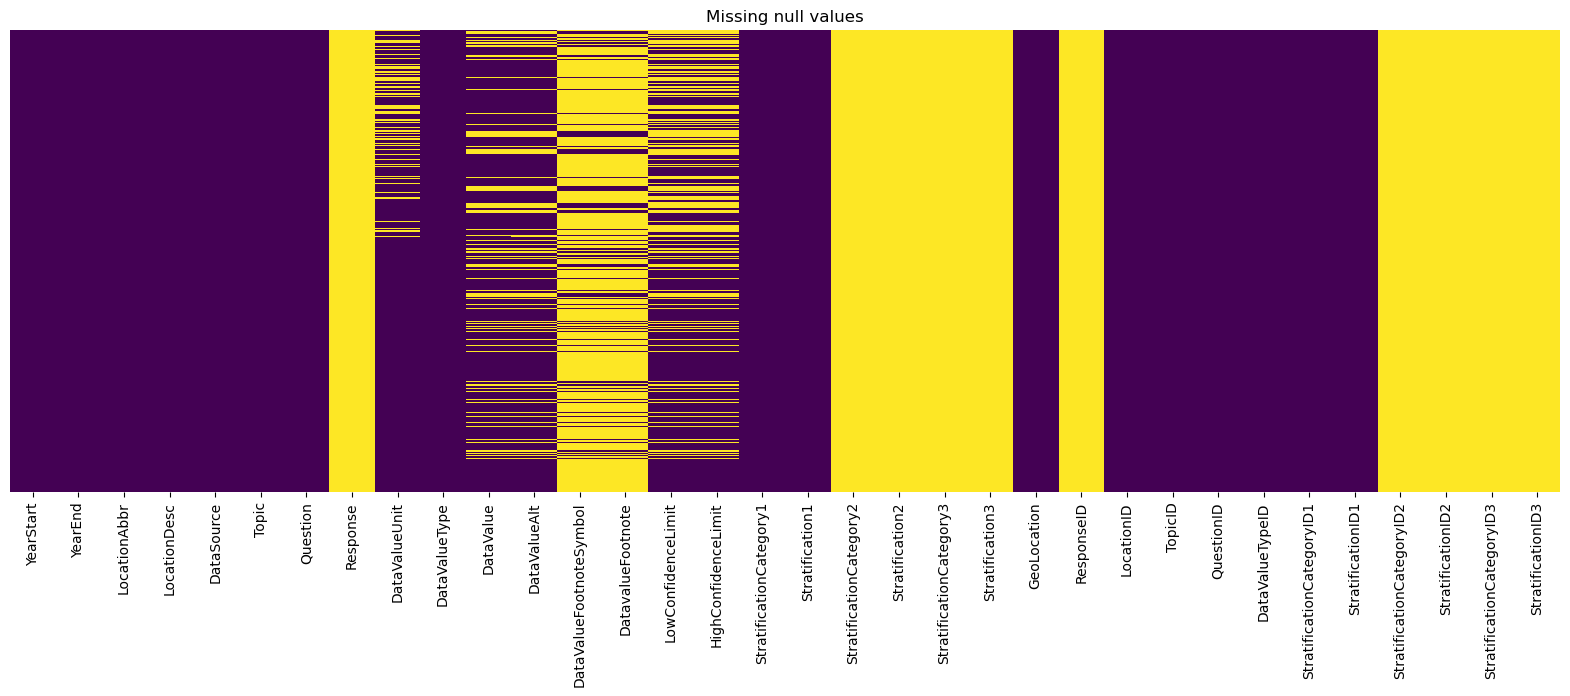

In [4]:
missing_percentage_pd = (
    filtered_df.isnull().mean() * 100  # Calculate percentage of missing values
).reset_index()

# Rename columns for clarity
missing_percentage_pd.columns = ["Column", "Missing_Percentage"]

# Save the missing percentage data to a CSV file
missing_percentage_pd.to_csv("missing_percentages_states_cdi.csv", index=False)

# Create a binary matrix for missing values (0 = not missing, 1 = missing)
missing_matrix = filtered_df.isnull().astype(int)

# Plot the heatmap of missing values
plt.figure(figsize=(20, 6))
sns.heatmap(missing_matrix, yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing null values")
#plt.savefig("figures/missing_percentages_COUNTY.png", format="png", dpi=800)
plt.show()

In [5]:
filtered_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [6]:
filtered_df = filtered_df.drop(['LocationAbbr', 'LocationDesc','DataValueAlt', 'DataValueFootnoteSymbol','DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
                                'Response', 'ResponseID', 'StratificationCategory2','StratificationCategoryID2', 'StratificationID2',
                                'StratificationCategoryID3', 'StratificationID3','Stratification2', 'StratificationCategory3', 
                                'Stratification3', 'LocationID', 'TopicID', 'QuestionID','DataValueTypeID', 'StratificationCategoryID1',
                                'StratificationID1', 'GeoLocation'], axis=1)
filtered_df

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
89,2014,2014,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1460,Race/Ethnicity,Hispanic
90,2015,2015,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,2496,Gender,Male
91,2016,2016,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,3880,Overall,Overall
92,2019,2019,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1711,Race/Ethnicity,Hispanic
170,2017,2017,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Age-adjusted Rate,NaN,Gender,Female
...,...,...,...,...,...,...,...,...,...,...
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,37.8,Race/Ethnicity,"Other, non-Hispanic"
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,35.4,Gender,Male
1185433,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Crude Prevalence,51.2,Race/Ethnicity,"Multiracial, non-Hispanic"
1185508,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,64.5,Race/Ethnicity,"Multiracial, non-Hispanic"


In [7]:
print('Topics:', filtered_df['Topic'].unique().tolist())
print('Data Sources:', filtered_df['DataSource'].unique().tolist())
print('Data Types:', filtered_df['DataValueType'].unique().tolist())

Topics: ['Alcohol', 'Asthma', 'Cancer', 'Chronic Kidney Disease', 'Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 'Diabetes', 'Older Adults', 'Overarching Conditions', 'Tobacco', 'Arthritis', 'Disability', 'Nutrition, Physical Activity, and Weight Status', 'Mental Health', 'Oral Health', 'Reproductive Health', 'Immunization']
Data Sources: ['NVSS', 'SEDD; SID', 'Death Certificate', 'Statewide central cancer registries', 'CMS Part A Claims Data', 'PRAMS', 'YRBSS', 'Legal Research', 'BRFSS', 'APIS', 'AEDS', 'USRDS', 'Birth Certificate, NVSS', 'CMS CCW', 'ACS 1-Year Estimates', 'CDC Breastfeeding Report Card', 'CDC School Health Profiles', 'National Immunization Survey', 'mPINC', "CDC Children's Food Environment State Indicator Report", "USDA National Farmers' Market Directory", 'ASHW', 'InfoUSA; USDA', 'NSCH', 'NVSS, Mortality', 'Current Population Survey', 'WFRS', 'HRSA, UDS', 'ACS 5-Year Estimates', 'STATE', 'ANRF']
Data Types: ['Number', 'Age-adjusted Rate', 'Averag

In [8]:
filtered_df.columns

Index(['YearStart', 'YearEnd', 'DataSource', 'Topic', 'Question',
       'DataValueUnit', 'DataValueType', 'DataValue',
       'StratificationCategory1', 'Stratification1'],
      dtype='object')

/tmp/ipykernel_550976/2520585138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


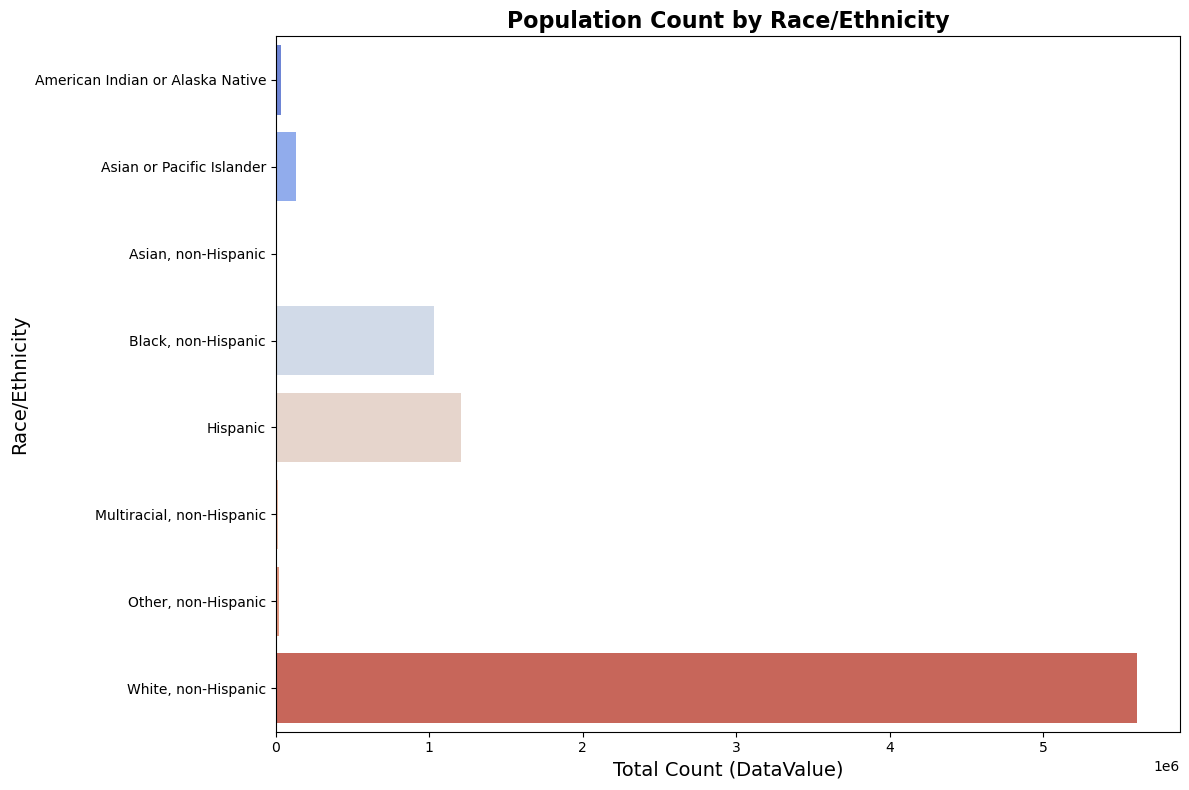

In [9]:
race_count_data = filtered_df[filtered_df['StratificationCategory1'] == 'Race/Ethnicity'][['Stratification1', 'DataValue']]

race_count_data = race_count_data.dropna()
race_count_data['DataValue'] = pd.to_numeric(race_count_data['DataValue'], errors='coerce')
race_count_data = race_count_data.dropna(subset=['DataValue'])
grouped_race_count = race_count_data.groupby('Stratification1')['DataValue'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped_race_count,
    x='DataValue',
    y='Stratification1',
    palette='coolwarm'
)

plt.title('Population Count by Race/Ethnicity', fontsize=16, weight='bold')
plt.xlabel('Total Count (DataValue)', fontsize=14)
plt.ylabel('Race/Ethnicity', fontsize=14)
plt.tight_layout()
#plt.savefig('../figures/brfss_chloe/popCount_Race_Ethnicity.png', format='png', bbox_inches='tight')
plt.show()

In [10]:
gender_count_data = filtered_df[filtered_df['StratificationCategory1'] == 'Gender'][['Stratification1', 'DataValue']]

gender_count_data = gender_count_data.dropna()
gender_count_data['DataValue'] = pd.to_numeric(gender_count_data['DataValue'], errors='coerce')
gender_count_data = gender_count_data.dropna(subset=['DataValue'])
grouped_gender_count = gender_count_data.groupby('Stratification1')['DataValue'].count().reset_index()

grouped_gender_count

,Stratification1,DataValue
0,Female,2358
1,Male,2311


/tmp/ipykernel_550976/2269886954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='StratificationCategory1', palette='Set2')


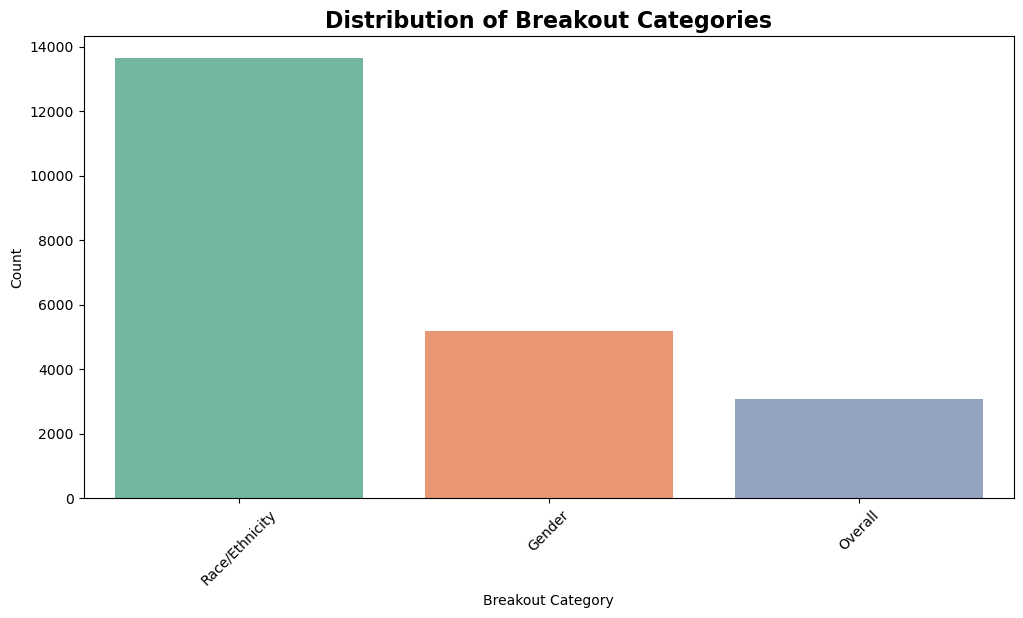

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='StratificationCategory1', palette='Set2')
plt.title('Distribution of Breakout Categories',fontsize=16,weight='bold')
plt.xlabel('Breakout Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_550976/1069118736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='DataValueType', palette='Set2')


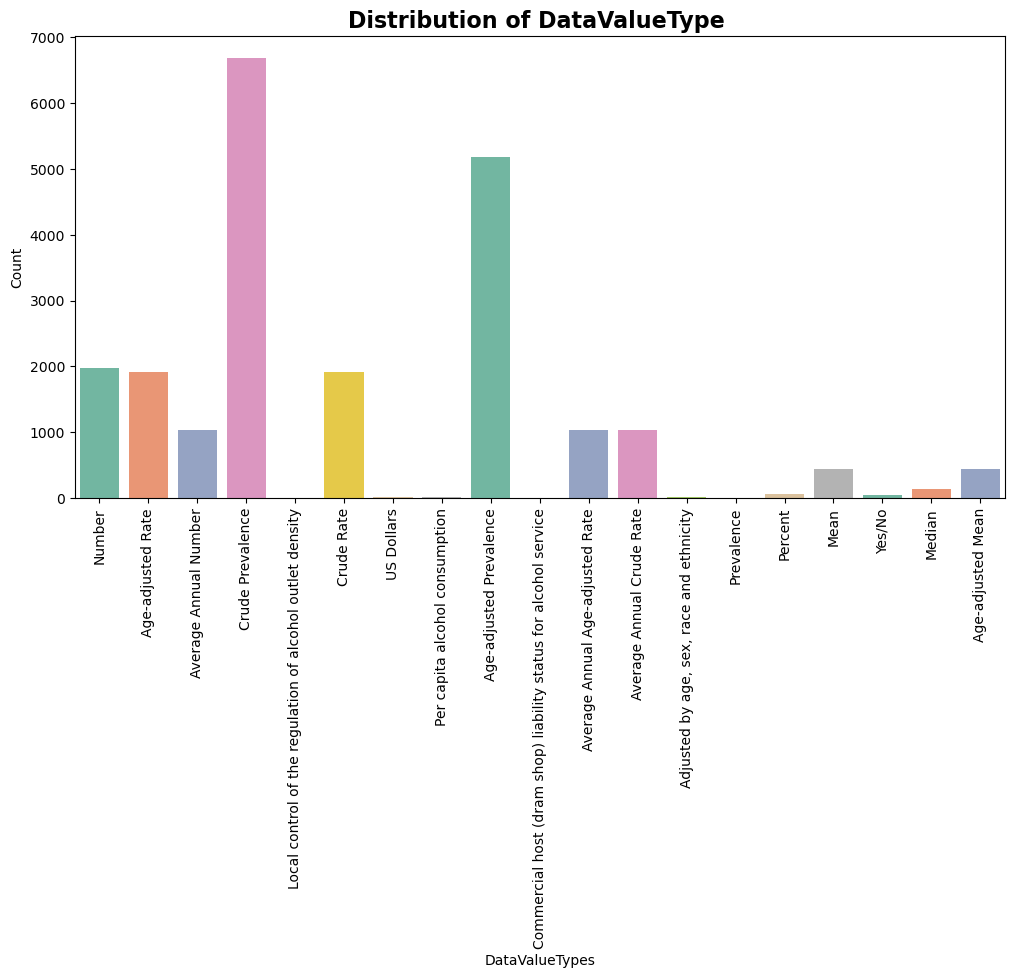

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='DataValueType', palette='Set2')
plt.title('Distribution of DataValueType ',fontsize=16,weight='bold')
plt.xlabel('DataValueTypes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_550976/2689556761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='DataValueUnit', palette='Set2')


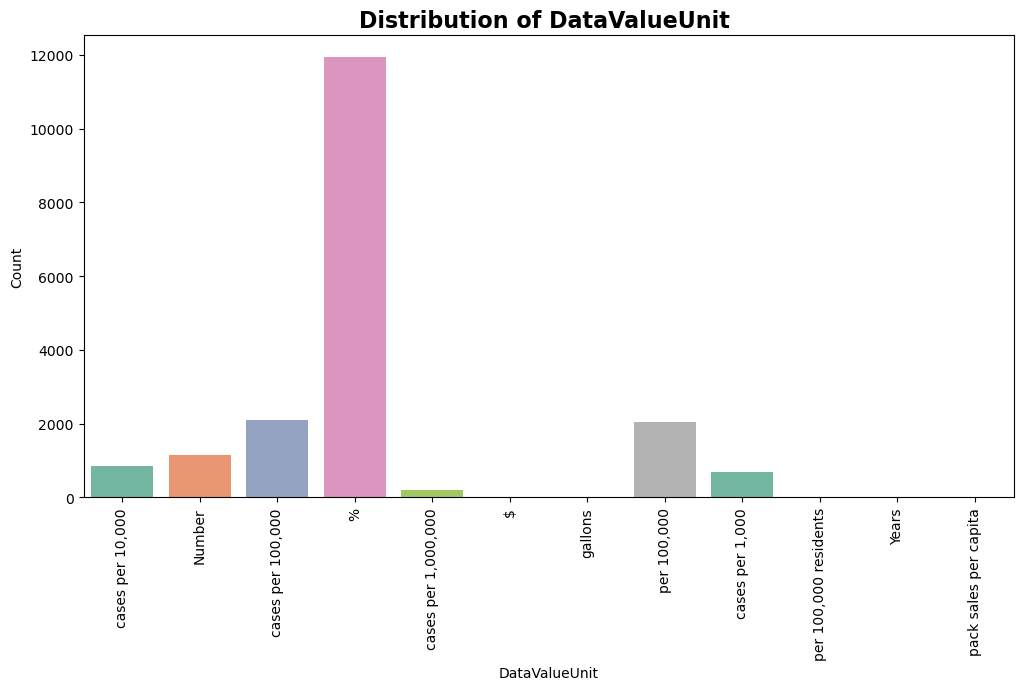

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='DataValueUnit', palette='Set2')
plt.title('Distribution of DataValueUnit ',fontsize=16,weight='bold')
plt.xlabel('DataValueUnit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
questions = filtered_df.groupby(['Topic','Question', 'DataValueType'])[['DataValue']].agg(set).reset_index()
questions


,Topic,Question,DataValueType,DataValue
0,Alcohol,Alcohol use among youth,Crude Prevalence,"{36.2, 26.8, nan, 24.8, 25.1, 35.9, 27.6, 28.5..."
1,Alcohol,Alcohol use before pregnancy,Crude Prevalence,"{38.2, 72.2, 49, 25.6, 64.5, 36.3, 50.8, 48.1,..."
2,Alcohol,Amount of alcohol excise tax by beverage type ...,US Dollars,{0.19}
3,Alcohol,Amount of alcohol excise tax by beverage type ...,US Dollars,"{2.4, 2.40}"
4,Alcohol,Amount of alcohol excise tax by beverage type ...,US Dollars,"{0.20, 0.2}"
...,...,...,...,...
363,Tobacco,Quit attempts in the past year among current s...,Crude Prevalence,"{nan, nan, nan, 45.6, 48.8, 49.7, 49.9, 52.5, ..."
364,Tobacco,Sale of cigarette packs,Number,"{36.2, 28.8, 31.9, 29.1, 32.8, 33.7}"
365,Tobacco,Secondary schools that have a comprehensive to...,Percent,"{68.5, nan, 80.0, 72.7}"
366,Tobacco,States that allow stronger local tobacco contr...,Yes/No,{No}


In [15]:
questions.to_csv('CDI_Topic_Question.csv', index=False)

In [16]:
temp = filtered_df[filtered_df['YearStart'] != filtered_df['YearEnd']]
temp

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
373,2008,2012,Death Certificate,Cancer,"Cancer of the prostate, mortality",NaN,Average Annual Number,13,Race/Ethnicity,Asian or Pacific Islander
706,2014,2018,Death Certificate,Cancer,"Cancer of the female cervix, mortality",NaN,Average Annual Number,411,Gender,Female
753,2008,2012,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,210,Race/Ethnicity,Asian or Pacific Islander
754,2010,2014,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,5248,Gender,Male
755,2011,2015,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,5387,Gender,Male
...,...,...,...,...,...,...,...,...,...,...
503359,2018,2019,NSCH,Oral Health,Preventive dental visits among children and ad...,%,Crude Prevalence,75.6,Gender,Male
503749,2019,2020,NSCH,Oral Health,Preventive dental visits among children and ad...,%,Crude Prevalence,78.1,Gender,Male
503948,2016,2017,NSCH,Oral Health,Preventive dental visits among children and ad...,%,Crude Prevalence,80.1,Gender,Male
504073,2018,2019,NSCH,Oral Health,Dental visits among children and adolescents a...,%,Crude Prevalence,81.6,Gender,Female


In [17]:
long_span = temp.groupby(['DataSource', 'Topic','Question', 'DataValueType'])[['DataValue']].agg(set).reset_index()

long_span

,DataSource,Topic,Question,DataValueType,DataValue
0,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...",Average Annual Age-adjusted Rate,"{2.4, 2.1, 4.3, 3.1, 3.5, 3.8, 8.8, 9.4, 8.6, ..."
1,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...",Average Annual Crude Rate,"{1.7, 1.9, 1.8, 5.8, 6.1, 7.7, 6.5, 5.3, 6.0, ..."
2,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...",Average Annual Number,"{514.0, 2180.0, 2181.0, 5.0, 2183.0, 6.0, 522...."
3,Death Certificate,Cancer,"Cancer of the female breast, mortality",Average Annual Age-adjusted Rate,"{4.7, 4.8, 5.5, 4.6, 5.1, 9.7, 9.9, 11.5, 10.0..."
4,Death Certificate,Cancer,"Cancer of the female breast, mortality",Average Annual Crude Rate,"{2.9, 3.7, nan, 3.5, 3.2, 7.9, 8.6, 8.1, 10.0,..."
5,Death Certificate,Cancer,"Cancer of the female breast, mortality",Average Annual Number,"{nan, 4.0, 5.0, 1669.0, 1798.0, 2825.0, 1682.0..."
6,Death Certificate,Cancer,"Cancer of the female cervix, mortality",Average Annual Age-adjusted Rate,"{1.5, 2.9, 3.9, 2.6, 2.8, 2.3, nan, 1.8, 4.4, ..."
7,Death Certificate,Cancer,"Cancer of the female cervix, mortality",Average Annual Crude Rate,"{1.3, 2.5, 2.6, 2.9, 2.7, 3.0, 3.6, 2.8, 1.2, ..."
8,Death Certificate,Cancer,"Cancer of the female cervix, mortality",Average Annual Number,"{131.0, 5.0, nan, 392.0, 8.0, 10.0, 11.0, 140...."
9,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality",Average Annual Age-adjusted Rate,"{7.9, 8.7, 9.0, 7.4, 9.1, 8.2, 16.8, 17.7, 18...."


In [18]:
long_span.to_csv('Conditions_wLongSpanningYears.csv')

In [19]:
values = filtered_df['DataValueType'].unique().tolist()
print('DataValueType:', values)

DataValueType: ['Number', 'Age-adjusted Rate', 'Average Annual Number', 'Crude Prevalence', 'Local control of the regulation of alcohol outlet density', 'Crude Rate', 'US Dollars', 'Per capita alcohol consumption', 'Age-adjusted Prevalence', 'Commercial host (dram shop) liability status for alcohol service', 'Average Annual Age-adjusted Rate', 'Average Annual Crude Rate', 'Adjusted by age, sex, race and ethnicity', 'Prevalence', 'Percent', 'Mean', 'Yes/No', 'Median', 'Age-adjusted Mean']


# PreProcessing

- numeric values need to be transformed into single unit (e.g. %, per case, per 10,000, per 100,000)
- pivot table created for Question (column) -> DataValue (rows)
- YearStart and YearEnd are condensed into Year -> Mid-year calculated 

In [20]:
rates_columns = [ 'Age-adjusted Rate','Crude Rate','Age-adjusted Prevalence','Average Annual Age-adjusted Rate','Average Annual Crude Rate']
prevalence_columns = ['Crude Prevalence','Prevalence','Age-adjusted Prevalence']
monetary_columns = ['US Dollars']
demographic_adjustments_columns = ['Adjusted by age, sex, race and ethnicity','Age-adjusted Mean']
statistical_measures_columns = ['Number','Mean','Median','Percent','Average Annual Number']
yes_no_columns = ['Yes/No','Commercial host (dram shop) liability status for alcohol service',
                  'Local control of the regulation of alcohol outlet density']

In [21]:
filtered_df['DataValue'] = pd.to_numeric(filtered_df['DataValue'], errors='coerce')
filtered_df['DataValue'] = filtered_df['DataValue'].replace(np.nan, 0)

In [22]:
df_prev = filtered_df[filtered_df['DataValueType'].isin(prevalence_columns)].drop(['StratificationCategory1', 'Stratification1'], axis=1)
df_rates = filtered_df[filtered_df['DataValueType'].isin(rates_columns)].drop(['StratificationCategory1', 'Stratification1'], axis=1)
df_stats = filtered_df[filtered_df['DataValueType'].isin(statistical_measures_columns)].drop(['StratificationCategory1', 'Stratification1'], axis=1)
df_dem = filtered_df[filtered_df['DataValueType'].isin(demographic_adjustments_columns)].drop(['StratificationCategory1', 'Stratification1'], axis=1)
df_bin =filtered_df[filtered_df['DataValueType'].isin(yes_no_columns)].drop(['StratificationCategory1', 'Stratification1'], axis=1)
df_money = filtered_df[filtered_df['DataValueType'].isin(monetary_columns)].drop(['StratificationCategory1', 'Stratification1'], axis=1)

### Prevalence

In [23]:
df_prev

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue
2587,2009,2011,PRAMS,Diabetes,Prevalence of pre-pregnancy diabetes,%,Crude Prevalence,0.0
2884,2019,2019,YRBSS,Tobacco,Current cigarette smoking among youth,%,Crude Prevalence,5.8
3069,2019,2019,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,0.0
3614,2015,2015,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,0.0
3815,2019,2019,YRBSS,Alcohol,Binge drinking prevalence among youth,%,Crude Prevalence,0.0
...,...,...,...,...,...,...,...,...
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,37.8
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,35.4
1185433,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Crude Prevalence,51.2
1185508,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,64.5


In [24]:
#print(df_prev['Question'].unique().tolist())
print(df_prev['Topic'].unique().tolist())
#print(df_prev['DataValueType'].unique().tolist())

['Diabetes', 'Tobacco', 'Alcohol', 'Arthritis', 'Cardiovascular Disease', 'Older Adults', 'Disability', 'Nutrition, Physical Activity, and Weight Status', 'Mental Health', 'Overarching Conditions', 'Oral Health', 'Reproductive Health', 'Asthma', 'Cancer', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Immunization']


In [25]:
df_prev['NormalizedDataValue'] = df_prev['DataValue'] / 100
df_prev = df_prev.drop(['DataValueUnit', 'DataValueType', 'DataValue'], axis=1).drop_duplicates()
df_prev

,YearStart,YearEnd,DataSource,Topic,Question,NormalizedDataValue
2587,2009,2011,PRAMS,Diabetes,Prevalence of pre-pregnancy diabetes,0.000
2884,2019,2019,YRBSS,Tobacco,Current cigarette smoking among youth,0.058
3069,2019,2019,YRBSS,Alcohol,Alcohol use among youth,0.000
3614,2015,2015,YRBSS,Alcohol,Alcohol use among youth,0.000
3815,2019,2019,YRBSS,Alcohol,Binge drinking prevalence among youth,0.000
...,...,...,...,...,...,...
1185097,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.458
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.378
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.354
1185433,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.512


In [26]:
temp1 = df_prev[df_prev['YearStart'] != df_prev['YearEnd']]
temp1

,YearStart,YearEnd,DataSource,Topic,Question,NormalizedDataValue
2587,2009,2011,PRAMS,Diabetes,Prevalence of pre-pregnancy diabetes,0.000
454250,2009,2011,PRAMS,Mental Health,Postpartum depressive symptoms,0.000
490203,2018,2019,NSCH,Oral Health,Preventive dental visits among children and ad...,0.804
491254,2019,2020,NSCH,Oral Health,Dental visits among children and adolescents a...,0.788
491283,2016,2017,NSCH,Oral Health,Preventive dental visits among children and ad...,0.777
491968,2019,2020,NSCH,Oral Health,Preventive dental visits among children and ad...,0.767
492124,2016,2017,NSCH,Oral Health,Dental visits among children and adolescents a...,0.816
492260,2017,2018,NSCH,Oral Health,Preventive dental visits among children and ad...,0.773
493031,2018,2019,NSCH,Oral Health,Dental visits among children and adolescents a...,0.774
495409,2016,2017,NSCH,Oral Health,Dental visits among children and adolescents a...,0.807


In [27]:
temp1.columns

Index(['YearStart', 'YearEnd', 'DataSource', 'Topic', 'Question',
       'NormalizedDataValue'],
      dtype='object')

In [28]:
temp1.loc[:, 'Year'] = temp1.apply(lambda row: row['YearStart'] if row['YearStart'] == row['YearEnd'] 
                                   else round((row['YearStart'] + row['YearEnd']) / 2), axis=1)
temp1['Year'] = temp1['Year'].astype(int)
temp1 = temp1.drop(['YearStart', 'YearEnd'], axis=1)
temp1

/tmp/ipykernel_550976/2062219904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.loc[:, 'Year'] = temp1.apply(lambda row: row['YearStart'] if row['YearStart'] == row['YearEnd']
/tmp/ipykernel_550976/2062219904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Year'] = temp1['Year'].astype(int)


,DataSource,Topic,Question,NormalizedDataValue,Year
2587,PRAMS,Diabetes,Prevalence of pre-pregnancy diabetes,0.000,2010
454250,PRAMS,Mental Health,Postpartum depressive symptoms,0.000,2010
490203,NSCH,Oral Health,Preventive dental visits among children and ad...,0.804,2018
491254,NSCH,Oral Health,Dental visits among children and adolescents a...,0.788,2020
491283,NSCH,Oral Health,Preventive dental visits among children and ad...,0.777,2016
491968,NSCH,Oral Health,Preventive dental visits among children and ad...,0.767,2020
492124,NSCH,Oral Health,Dental visits among children and adolescents a...,0.816,2016
492260,NSCH,Oral Health,Preventive dental visits among children and ad...,0.773,2018
493031,NSCH,Oral Health,Dental visits among children and adolescents a...,0.774,2018
495409,NSCH,Oral Health,Dental visits among children and adolescents a...,0.807,2016


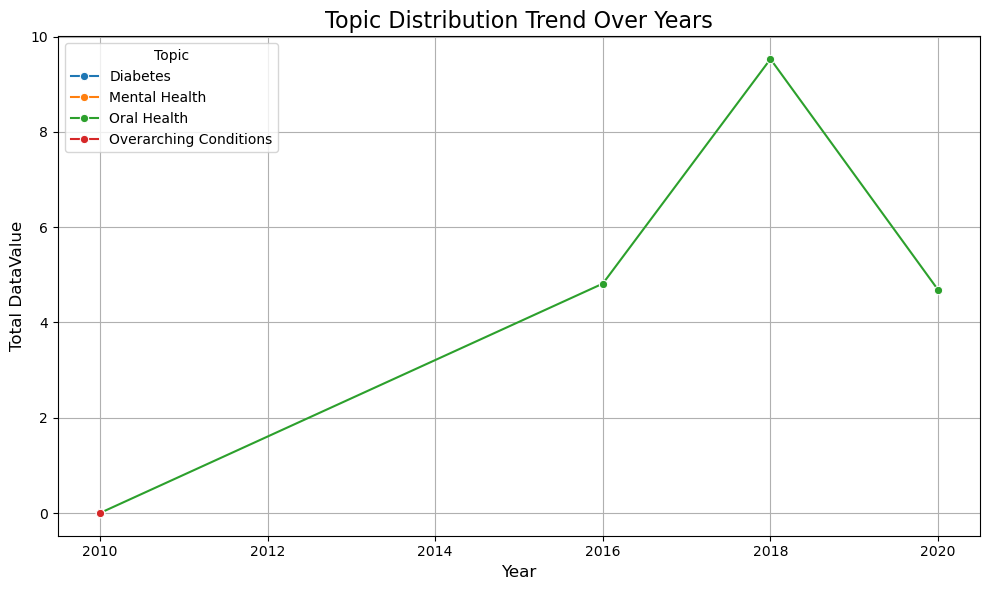

In [29]:
# Step 2: Aggregating data by Topic and Year
df_grouped = temp1.groupby(['Year', 'Topic'])['NormalizedDataValue'].sum().reset_index()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='NormalizedDataValue', hue='Topic', marker='o')

# Adding labels and title
plt.title('Topic Distribution Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total DataValue', fontsize=12)
plt.legend(title='Topic', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [30]:
temp2 = df_prev[df_prev['YearStart'] == df_prev['YearEnd']]
temp2

,YearStart,YearEnd,DataSource,Topic,Question,NormalizedDataValue
2884,2019,2019,YRBSS,Tobacco,Current cigarette smoking among youth,0.058
3069,2019,2019,YRBSS,Alcohol,Alcohol use among youth,0.000
3614,2015,2015,YRBSS,Alcohol,Alcohol use among youth,0.000
3815,2019,2019,YRBSS,Alcohol,Binge drinking prevalence among youth,0.000
3930,2013,2013,YRBSS,Alcohol,Alcohol use among youth,0.362
...,...,...,...,...,...,...
1185097,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.458
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.378
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.354
1185433,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.512


In [31]:
temp2 = temp2.rename(columns={'YearStart': 'Year'}).drop(['YearEnd'], axis=1)
temp2

,Year,DataSource,Topic,Question,NormalizedDataValue
2884,2019,YRBSS,Tobacco,Current cigarette smoking among youth,0.058
3069,2019,YRBSS,Alcohol,Alcohol use among youth,0.000
3614,2015,YRBSS,Alcohol,Alcohol use among youth,0.000
3815,2019,YRBSS,Alcohol,Binge drinking prevalence among youth,0.000
3930,2013,YRBSS,Alcohol,Alcohol use among youth,0.362
...,...,...,...,...,...
1185097,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.458
1185213,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.378
1185248,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.354
1185433,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.512


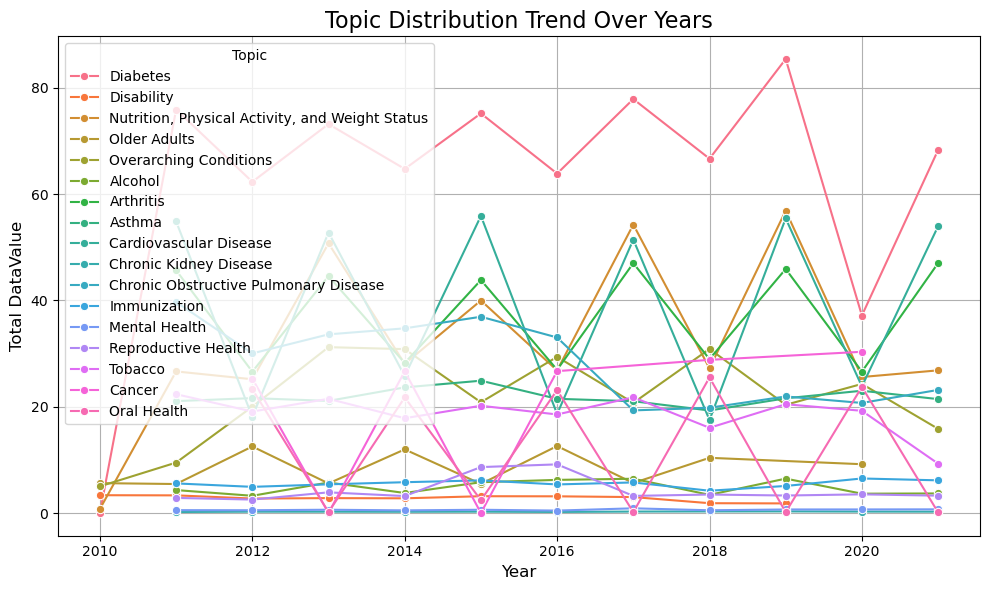

In [32]:
# Step 2: Aggregating data by Topic and Year
df_grouped = temp2.groupby(['Year', 'Topic'])['NormalizedDataValue'].sum().reset_index()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='NormalizedDataValue', hue='Topic', marker='o')

# Adding labels and title
plt.title('Topic Distribution Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total DataValue', fontsize=12)
plt.legend(title='Topic', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [33]:
df_prev = pd.concat([temp1, temp2], axis=0, ignore_index=True)
df_prev

,DataSource,Topic,Question,NormalizedDataValue,Year
0,PRAMS,Diabetes,Prevalence of pre-pregnancy diabetes,0.000,2010
1,PRAMS,Mental Health,Postpartum depressive symptoms,0.000,2010
2,NSCH,Oral Health,Preventive dental visits among children and ad...,0.804,2018
3,NSCH,Oral Health,Dental visits among children and adolescents a...,0.788,2020
4,NSCH,Oral Health,Preventive dental visits among children and ad...,0.777,2016
...,...,...,...,...,...
9411,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.458,2019
9412,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.378,2019
9413,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.354,2019
9414,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,0.512,2019


In [34]:
df_prev.columns

Index(['DataSource', 'Topic', 'Question', 'NormalizedDataValue', 'Year'], dtype='object')

In [35]:
pivot_df = df_prev.pivot_table(
    index=['DataSource', 'Topic', 'Year'],  # Keep 'DataSource', 'Topic', and 'Year'
    columns='Question',  # Pivot 'Question' to columns
    values='NormalizedDataValue',  # Use 'DataValue' as the values
    aggfunc='first'  # If there are multiple values, choose the first
)

pivot_df.columns = pivot_df.columns.astype(str)  # Convert columns to string for easier handling
pivot_df = pivot_df.reset_index().fillna(0)
pivot_df

Question,DataSource,Topic,Year,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,Alcohol use among youth,Alcohol use before pregnancy,All teeth lost among adults aged >= 65 years,Arthritis among adults aged >= 18 years,Arthritis among adults aged >= 18 years who are obese,Arthritis among adults aged >= 18 years who have diabetes,Arthritis among adults aged >= 18 years who have heart disease,Asthma prevalence among women aged 18-44 years,At least 14 recent mentally unhealthy days among women aged 18-44 years,Awareness of high blood pressure among adults aged >= 18 years,Awareness of high blood pressure among women aged 18-44 years,Binge drinking prevalence among adults aged >= 18 years,Binge drinking prevalence among women aged 18-44 years,Binge drinking prevalence among youth,Cholesterol screening among adults aged >= 18 years,Cigarette smoking before pregnancy,Computer use among high school students,Current asthma prevalence among adults aged >= 18 years,Current cigarette smoking among women aged 18-44 years,Current cigarette smoking among youth,Current health care coverage among women aged 18-44 years,Current lack of health insurance among adults aged 18-64 years,Current smokeless tobacco use among adults aged >= 18 years,Current smokeless tobacco use among youth,Current smoking among adults aged >= 18 years,Dental visits among children and adolescents aged 1-17 years,Diabetes prevalence among women aged 18-44 years,Dilated eye examination among adults aged >= 18 years with diagnosed diabetes,Disability among adults aged >= 65 years,Fair or poor health among adults aged >= 18 years with arthritis,Fair or poor self-rated health status among adults aged >= 18 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Folic acid supplementation,Foot examination among adults aged >= 18 years with diagnosed diabetes,Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes,Health insurance coverage before pregnancy,Healthy weight among adults aged >= 18 years,Healthy weight among high school students,Heavy drinking among adults aged >= 18 years,Heavy drinking among women aged 18-44 years,High cholesterol prevalence among adults aged >= 18 years,High school completion among adults aged 18-24 years,High school completion among women aged 18-44 years,Infants breastfed at 6 months,Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,Influenza vaccination among noninstitutionalized adults aged >= 18 years,Influenza vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease,Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes,Mammography use among women aged 50-74 years,Meeting aerobic physical activity guidelines among high school students,Meeting aerobic physical activity guidelines for additional and more extensive health benefits among adults aged >= 18 years,Meeting aerobic physical activity guidelines for substantial health benefits among adults aged >= 18 years,Meeting aerobic physical activity guidelines for substantial health benefits and for muscle-strengthening activity among adults aged >= 18 years,No leisure-time physical activity among adults aged >= 18 years,No too

In [36]:
columns_all_zero = pivot_df.columns[(pivot_df == 0).all()]
print(columns_all_zero)

Index(['Cigarette smoking before pregnancy',
       'Health insurance coverage before pregnancy',
       'Postpartum depressive symptoms', 'Pre-pregnancy hypertension',
       'Prevalence of pre-pregnancy diabetes',
       'Preventive dental care before pregnancy'],
      dtype='object', name='Question')


In [37]:
df_prev = pivot_df.copy()
df_prev = df_prev.drop(['Cigarette smoking before pregnancy',
       'Health insurance coverage before pregnancy',
       'Postpartum depressive symptoms', 'Pre-pregnancy hypertension',
       'Prevalence of pre-pregnancy diabetes',
       'Preventive dental care before pregnancy'], axis=1)
df_prev

Question,DataSource,Topic,Year,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,Alcohol use among youth,Alcohol use before pregnancy,All teeth lost among adults aged >= 65 years,Arthritis among adults aged >= 18 years,Arthritis among adults aged >= 18 years who are obese,Arthritis among adults aged >= 18 years who have diabetes,Arthritis among adults aged >= 18 years who have heart disease,Asthma prevalence among women aged 18-44 years,At least 14 recent mentally unhealthy days among women aged 18-44 years,Awareness of high blood pressure among adults aged >= 18 years,Awareness of high blood pressure among women aged 18-44 years,Binge drinking prevalence among adults aged >= 18 years,Binge drinking prevalence among women aged 18-44 years,Binge drinking prevalence among youth,Cholesterol screening among adults aged >= 18 years,Computer use among high school students,Current asthma prevalence among adults aged >= 18 years,Current cigarette smoking among women aged 18-44 years,Current cigarette smoking among youth,Current health care coverage among women aged 18-44 years,Current lack of health insurance among adults aged 18-64 years,Current smokeless tobacco use among adults aged >= 18 years,Current smokeless tobacco use among youth,Current smoking among adults aged >= 18 years,Dental visits among children and adolescents aged 1-17 years,Diabetes prevalence among women aged 18-44 years,Dilated eye examination among adults aged >= 18 years with diagnosed diabetes,Disability among adults aged >= 65 years,Fair or poor health among adults aged >= 18 years with arthritis,Fair or poor self-rated health status among adults aged >= 18 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Folic acid supplementation,Foot examination among adults aged >= 18 years with diagnosed diabetes,Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes,Healthy weight among adults aged >= 18 years,Healthy weight among high school students,Heavy drinking among adults aged >= 18 years,Heavy drinking among women aged 18-44 years,High cholesterol prevalence among adults aged >= 18 years,High school completion among adults aged 18-24 years,High school completion among women aged 18-44 years,Infants breastfed at 6 months,Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,Influenza vaccination among noninstitutionalized adults aged >= 18 years,Influenza vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease,Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes,Mammography use among women aged 50-74 years,Meeting aerobic physical activity guidelines among high school students,Meeting aerobic physical activity guidelines for additional and more extensive health benefits among adults aged >= 18 years,Meeting aerobic physical activity guidelines for substantial health benefits among adults aged >= 18 years,Meeting aerobic physical activity guidelines for substantial health benefits and for muscle-strengthening activity among adults aged >= 18 years,No leisure-time physical activity among adults aged >= 18 years,No tooth loss among adults aged 18-64 years,Obesity among adults aged >= 18 years,Ob

In [38]:
df_prev.to_csv('CDI/PrevalenceOfConditions_CDI.csv', index=False)

### Rates

In [39]:
df_rates

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue
170,2017,2017,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Age-adjusted Rate,0.0
1374,2016,2016,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,42.3
1660,2015,2015,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,68.9
18586,2013,2013,NVSS,Asthma,Asthma mortality rate,"cases per 1,000,000",Crude Rate,3.1
18610,2020,2020,NVSS,Alcohol,Chronic liver disease mortality,"cases per 100,000",Crude Rate,16.8
...,...,...,...,...,...,...,...,...
1184786,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,62.5
1184969,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,56.1
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,37.8
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,35.4


Normalize data so it is all single unit

    cases per 100,000 → cases per 10,000: divide by 10.
    cases per 1,000,000 → cases per 10,000: divide by 100.
    % → cases per 10,000: multiply by 100.
    cases per 1,000 → cases per 10,000: multiply by 10.
    per 100,000 → cases per 10,000: divide by 10.

In [40]:
#print(df_rates['Question'].unique().tolist())
print(df_rates['Topic'].unique().tolist())
print(df_rates['DataValueUnit'].unique().tolist())

['Asthma', 'Cardiovascular Disease', 'Alcohol', 'Arthritis', 'Cancer', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Diabetes', 'Older Adults', 'Overarching Conditions', 'Nutrition, Physical Activity, and Weight Status', 'Tobacco', 'Oral Health', 'Immunization']
['cases per 10,000', 'cases per 100,000', 'cases per 1,000,000', '%', 'per 100,000', 'cases per 1,000']


In [41]:
unit_conversion = {
    'cases per 100,000': 0.1,  # divide by 10
    'cases per 1,000,000': 0.01,  # divide by 100
    '%': 100,  # multiply by 100
    'cases per 1,000': 10,  # multiply by 10
    'per 100,000': 0.1,  # divide by 10
    'cases per 10,000': 1  # already in the desired unit
}

# Function to normalize DataValue based on DataValueUnit
def normalize_data(row):
    conversion_factor = unit_conversion.get(row['DataValueUnit'], 1)  # Default to 1 if unit is not found
    return row['DataValue'] * conversion_factor

# Apply the normalization
df_rates['NormalizedDataValue'] = df_rates.apply(normalize_data, axis=1)
df_rates

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
170,2017,2017,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Age-adjusted Rate,0.0,0.000
1374,2016,2016,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,42.3,4.230
1660,2015,2015,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,68.9,6.890
18586,2013,2013,NVSS,Asthma,Asthma mortality rate,"cases per 1,000,000",Crude Rate,3.1,0.031
18610,2020,2020,NVSS,Alcohol,Chronic liver disease mortality,"cases per 100,000",Crude Rate,16.8,1.680
...,...,...,...,...,...,...,...,...,...
1184786,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,62.5,6250.000
1184969,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,56.1,5610.000
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,37.8,3780.000
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,35.4,3540.000


In [42]:
temp1 = df_rates[df_rates['YearStart'] != df_rates['YearEnd']]
temp1

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
44533,2013,2017,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,1.2,0.12
49096,2013,2017,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,6.8,0.68
49100,2008,2012,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,16.4,1.64
49180,2010,2014,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,0.3,0.03
49294,2014,2018,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Crude Rate,6.2,0.62
...,...,...,...,...,...,...,...,...,...
217201,2010,2014,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Crude Rate,4.1,0.41
217282,2008,2012,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,3.4,0.34
217483,2013,2017,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,2.9,0.29
217709,2012,2016,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,0.3,0.03


In [43]:
temp1.loc[:, 'Year'] = temp1.apply(lambda row: row['YearStart'] if row['YearStart'] == row['YearEnd'] 
                                   else round((row['YearStart'] + row['YearEnd']) / 2), axis=1)
temp1['Year'] = temp1['Year'].astype(int)
temp1 = temp1.drop(['YearStart', 'YearEnd'], axis=1)
temp1

/tmp/ipykernel_550976/2062219904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.loc[:, 'Year'] = temp1.apply(lambda row: row['YearStart'] if row['YearStart'] == row['YearEnd']
/tmp/ipykernel_550976/2062219904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Year'] = temp1['Year'].astype(int)


,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue,Year
44533,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,1.2,0.12,2015
49096,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,6.8,0.68,2015
49100,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,16.4,1.64,2010
49180,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,0.3,0.03,2012
49294,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Crude Rate,6.2,0.62,2016
...,...,...,...,...,...,...,...,...
217201,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Crude Rate,4.1,0.41,2012
217282,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,3.4,0.34,2010
217483,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,2.9,0.29,2015
217709,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,0.3,0.03,2014


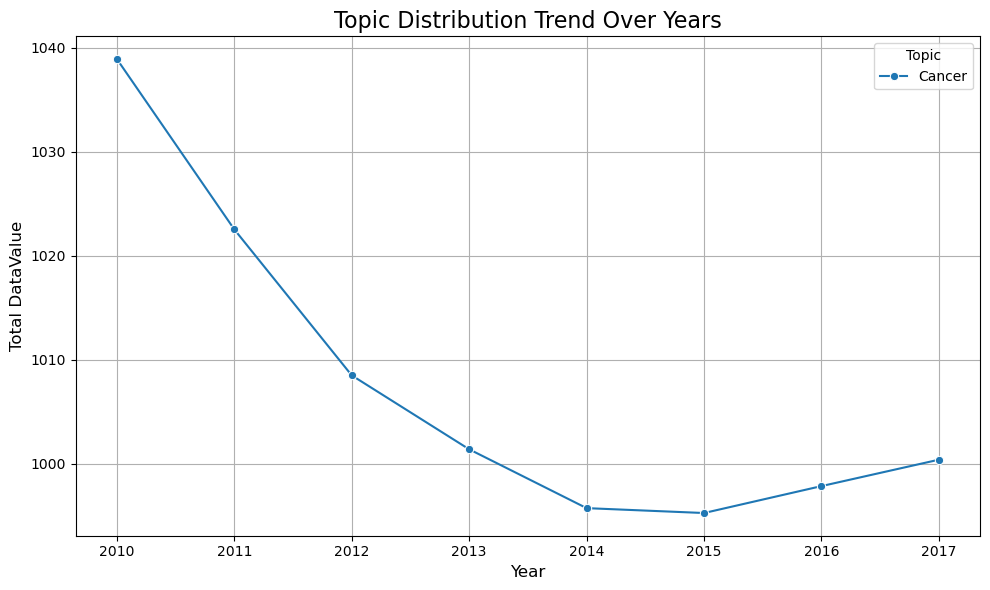

In [44]:
# Step 2: Aggregating data by Topic and Year
df_grouped = temp1.groupby(['Year', 'Topic'])['NormalizedDataValue'].sum().reset_index()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='NormalizedDataValue', hue='Topic', marker='o')

# Adding labels and title
plt.title('Topic Distribution Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total DataValue', fontsize=12)
plt.legend(title='Topic', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [45]:
temp1 = temp1[['Year', 'DataSource', 'Topic', 'Question', 'NormalizedDataValue']]
temp1

,Year,DataSource,Topic,Question,NormalizedDataValue
44533,2015,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.12
49096,2015,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.68
49100,2010,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",1.64
49180,2012,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.03
49294,2016,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.62
...,...,...,...,...,...
217201,2012,Death Certificate,Cancer,"Melanoma, mortality",0.41
217282,2010,Death Certificate,Cancer,"Melanoma, mortality",0.34
217483,2015,Death Certificate,Cancer,"Melanoma, mortality",0.29
217709,2014,Death Certificate,Cancer,"Melanoma, mortality",0.03


In [46]:
temp2 = df_rates[df_rates['YearStart'] == df_rates['YearEnd']]
temp2

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
170,2017,2017,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Age-adjusted Rate,0.0,0.000
1374,2016,2016,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,42.3,4.230
1660,2015,2015,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,68.9,6.890
18586,2013,2013,NVSS,Asthma,Asthma mortality rate,"cases per 1,000,000",Crude Rate,3.1,0.031
18610,2020,2020,NVSS,Alcohol,Chronic liver disease mortality,"cases per 100,000",Crude Rate,16.8,1.680
...,...,...,...,...,...,...,...,...,...
1184786,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,62.5,6250.000
1184969,2017,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,56.1,5610.000
1185213,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,37.8,3780.000
1185248,2019,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,35.4,3540.000


In [47]:
temp2 = temp2.rename(columns={'YearStart': 'Year'}).drop(['YearEnd'], axis=1)
temp2

,Year,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
170,2017,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Age-adjusted Rate,0.0,0.000
1374,2016,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,42.3,4.230
1660,2015,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Age-adjusted Rate,68.9,6.890
18586,2013,NVSS,Asthma,Asthma mortality rate,"cases per 1,000,000",Crude Rate,3.1,0.031
18610,2020,NVSS,Alcohol,Chronic liver disease mortality,"cases per 100,000",Crude Rate,16.8,1.680
...,...,...,...,...,...,...,...,...
1184786,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,62.5,6250.000
1184969,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,56.1,5610.000
1185213,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,37.8,3780.000
1185248,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,35.4,3540.000


In [48]:
temp2 = temp2[['Year', 'DataSource', 'Topic', 'Question', 'NormalizedDataValue']]
temp2

,Year,DataSource,Topic,Question,NormalizedDataValue
170,2017,SEDD; SID,Asthma,Hospitalizations for asthma,0.000
1374,2016,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,4.230
1660,2015,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,6.890
18586,2013,NVSS,Asthma,Asthma mortality rate,0.031
18610,2020,NVSS,Alcohol,Chronic liver disease mortality,1.680
...,...,...,...,...,...
1184786,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,6250.000
1184969,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,5610.000
1185213,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,3780.000
1185248,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,3540.000


In [49]:
df_rates = pd.concat([temp1, temp2], axis=0, ignore_index=True)
df_rates

,Year,DataSource,Topic,Question,NormalizedDataValue
0,2015,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.12
1,2015,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.68
2,2010,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",1.64
3,2012,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.03
4,2016,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",0.62
...,...,...,...,...,...
11071,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,6250.00
11072,2017,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,5610.00
11073,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,3780.00
11074,2019,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,3540.00


In [50]:

pivot_df = df_rates.pivot_table(
    index=['DataSource', 'Topic', 'Year'],  # Keep 'DataSource', 'Topic', and 'Year'
    columns='Question',  # Pivot 'Question' to columns
    values='NormalizedDataValue',  # Use 'DataValue' as the values
    aggfunc='first'  # If there are multiple values, choose the first
)

pivot_df.columns = pivot_df.columns.astype(str)  # Convert columns to string for easier handling
pivot_df = pivot_df.reset_index().fillna(0)
pivot_df

Question,DataSource,Topic,Year,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,All teeth lost among adults aged >= 65 years,Amputation of a lower extremity attributable to diabetes,Arthritis among adults aged >= 18 years,Arthritis among adults aged >= 18 years who are obese,Arthritis among adults aged >= 18 years who have diabetes,Arthritis among adults aged >= 18 years who have heart disease,Asthma mortality rate,Awareness of high blood pressure among adults aged >= 18 years,Binge drinking prevalence among adults aged >= 18 years,"Cancer of the colon and rectum (colorectal), incidence","Cancer of the colon and rectum (colorectal), mortality","Cancer of the female breast, mortality","Cancer of the female cervix, mortality","Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality","Cancer of the oral cavity and pharynx, mortality","Cancer of the prostate, mortality",Cholesterol screening among adults aged >= 18 years,Chronic liver disease mortality,Current asthma prevalence among adults aged >= 18 years,Current lack of health insurance among adults aged 18-64 years,Current smokeless tobacco use among adults aged >= 18 years,Current smoking among adults aged >= 18 years,Dilated eye examination among adults aged >= 18 years with diagnosed diabetes,Emergency department visit rate for asthma,Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis,Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis,Fair or poor health among adults aged >= 18 years with arthritis,Fair or poor self-rated health status among adults aged >= 18 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Foot examination among adults aged >= 18 years with diagnosed diabetes,Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes,Healthy weight among adults aged >= 18 years,Heavy drinking among adults aged >= 18 years,High cholesterol prevalence among adults aged >= 18 years,Hospitalization for acute myocardial infarction,Hospitalization for chronic obstructive pulmonary disease as any diagnosis,Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis,Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Hospitalization for stroke,Hospitalization with diabetes as a listed diagnosis,Hospitalizations for asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,Influenza vaccination among noninstitutionalized adults aged >= 18 years,Influenza vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease,Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes,"Invasive cancer (all sites combined), incidence","Invasive cancer (all sites combined), mortality","Invasive cancer of the cervix, incidence","Inv

In [51]:
columns_all_zero = pivot_df.columns[(pivot_df == 0).all()]
print(columns_all_zero)

Index(['Amputation of a lower extremity attributable to diabetes',
       'Emergency department visit rate for asthma',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for acute myocardial infarction',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for stroke',
       'Hospitalization with diabetes as a listed diagnosis',
       'Hospitalizations for asthma'],
      dtype='object', name='Question')


In [52]:
df_rates = pivot_df.copy()
df_rates = df_rates.drop(['Amputation of a lower extremity attributable to diabetes',
       'Emergency department visit rate for asthma',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for acute myocardial infarction',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for stroke',
       'Hospitalization with diabetes as a listed diagnosis',
       'Hospitalizations for asthma'], axis=1)
df_rates

Question,DataSource,Topic,Year,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,All teeth lost among adults aged >= 65 years,Arthritis among adults aged >= 18 years,Arthritis among adults aged >= 18 years who are obese,Arthritis among adults aged >= 18 years who have diabetes,Arthritis among adults aged >= 18 years who have heart disease,Asthma mortality rate,Awareness of high blood pressure among adults aged >= 18 years,Binge drinking prevalence among adults aged >= 18 years,"Cancer of the colon and rectum (colorectal), incidence","Cancer of the colon and rectum (colorectal), mortality","Cancer of the female breast, mortality","Cancer of the female cervix, mortality","Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality","Cancer of the oral cavity and pharynx, mortality","Cancer of the prostate, mortality",Cholesterol screening among adults aged >= 18 years,Chronic liver disease mortality,Current asthma prevalence among adults aged >= 18 years,Current lack of health insurance among adults aged 18-64 years,Current smokeless tobacco use among adults aged >= 18 years,Current smoking among adults aged >= 18 years,Dilated eye examination among adults aged >= 18 years with diagnosed diabetes,Fair or poor health among adults aged >= 18 years with arthritis,Fair or poor self-rated health status among adults aged >= 18 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Foot examination among adults aged >= 18 years with diagnosed diabetes,Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes,Healthy weight among adults aged >= 18 years,Heavy drinking among adults aged >= 18 years,High cholesterol prevalence among adults aged >= 18 years,Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Influenza vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,Influenza vaccination among noninstitutionalized adults aged >= 18 years,Influenza vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease,Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke,Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma,Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes,"Invasive cancer (all sites combined), incidence","Invasive cancer (all sites combined), mortality","Invasive cancer of the cervix, incidence","Invasive cancer of the female breast, incidence","Invasive cancer of the oral cavity or pharynx, incidence","Invasive cancer of the prostate, incidence","Invasive melanoma, incidence",Mammography use among women aged 50-74 years,Meeting aerobic physical activity guidelines for additional and more extensive health benefits among adults aged >= 18 years,Meeting aerobic physical activity guidelines for substantial health benefits among adults aged >= 18 years,Meeting aerobic physical activity guidelines for substantial health benefits and for muscle-strengthening activity among adults aged >= 18 years,"M

In [53]:
df_prev.to_csv('CDI/RatesOfConditions_CDI.csv', index=False)

#### Statistics

In [54]:
df_stats

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue
89,2014,2014,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1460.0
90,2015,2015,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,2496.0
91,2016,2016,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,3880.0
92,2019,2019,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1711.0
244,2012,2012,NVSS,Asthma,Asthma mortality rate,NaN,Number,84.0
...,...,...,...,...,...,...,...,...
1090252,2016,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,3.5
1090265,2020,2020,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.5
1090285,2020,2020,BRFSS,Alcohol,Binge drinking intensity among adults aged >= ...,Number,Mean,0.0
1090299,2016,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1


In [55]:
print(df_stats['Topic'].unique().tolist())
print(df_stats['DataValueUnit'].unique().tolist())
print(df_stats['DataValueType'].unique().tolist())


['Alcohol', 'Asthma', 'Cancer', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease', 'Diabetes', 'Older Adults', 'Overarching Conditions', 'Nutrition, Physical Activity, and Weight Status', 'Oral Health', 'Tobacco', 'Mental Health']
[nan, 'Number', 'cases per 1,000,000', '%', 'per 100,000 residents', 'Years', 'pack sales per capita']
['Number', 'Average Annual Number', 'Percent', 'Mean', 'Median']


In [56]:
unit_conversion = {
    'nan': np.nan,  # Handle 'nan' as NaN
    'Number': 1,  # Assume 'Number' can be considered as a unit with no conversion
    'cases per 1,000,000': 0.01,  # Convert to cases per 10,000
    '%': 100,  # Percent should be multiplied by 100
    'per 100,000 residents': 0.1,  # Divide by 10 to get cases per 10,000
    'Years': 1,  # No conversion for 'Years'
    'pack sales per capita': 1  # No conversion for 'pack sales per capita'
}


df_stats['NormalizedDataValue'] = df_stats.apply(normalize_data, axis=1)
df_stats

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
89,2014,2014,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1460.0,1460.0
90,2015,2015,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,2496.0,2496.0
91,2016,2016,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,3880.0,3880.0
92,2019,2019,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1711.0,1711.0
244,2012,2012,NVSS,Asthma,Asthma mortality rate,NaN,Number,84.0,84.0
...,...,...,...,...,...,...,...,...,...
1090252,2016,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,3.5,3.5
1090265,2020,2020,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.5,2.5
1090285,2020,2020,BRFSS,Alcohol,Binge drinking intensity among adults aged >= ...,Number,Mean,0.0,0.0
1090299,2016,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1


In [57]:
temp1 = df_stats[df_stats['YearStart'] != df_stats['YearEnd']]
temp1

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
373,2008,2012,Death Certificate,Cancer,"Cancer of the prostate, mortality",NaN,Average Annual Number,13.0,13.0
706,2014,2018,Death Certificate,Cancer,"Cancer of the female cervix, mortality",NaN,Average Annual Number,411.0,411.0
753,2008,2012,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,210.0,210.0
754,2010,2014,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,5248.0,5248.0
755,2011,2015,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,5387.0,5387.0
...,...,...,...,...,...,...,...,...,...
217299,2009,2013,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,11.0,11.0
217550,2008,2012,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,366.0,366.0
217624,2011,2015,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,358.0,358.0
217648,2010,2014,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,0.0,0.0


In [58]:
temp1.loc[:, 'Year'] = temp1.apply(lambda row: row['YearStart'] if row['YearStart'] == row['YearEnd'] 
                                   else round((row['YearStart'] + row['YearEnd']) / 2), axis=1)
temp1['Year'] = temp1['Year'].astype(int)
temp1 = temp1.drop(['YearStart', 'YearEnd'], axis=1)
temp1

/tmp/ipykernel_550976/2062219904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.loc[:, 'Year'] = temp1.apply(lambda row: row['YearStart'] if row['YearStart'] == row['YearEnd']
/tmp/ipykernel_550976/2062219904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Year'] = temp1['Year'].astype(int)


,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue,Year
373,Death Certificate,Cancer,"Cancer of the prostate, mortality",NaN,Average Annual Number,13.0,13.0,2010
706,Death Certificate,Cancer,"Cancer of the female cervix, mortality",NaN,Average Annual Number,411.0,411.0,2016
753,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,210.0,210.0,2010
754,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,5248.0,5248.0,2012
755,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",NaN,Average Annual Number,5387.0,5387.0,2013
...,...,...,...,...,...,...,...,...
217299,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,11.0,11.0,2011
217550,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,366.0,366.0,2010
217624,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,358.0,358.0,2013
217648,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,0.0,0.0,2012


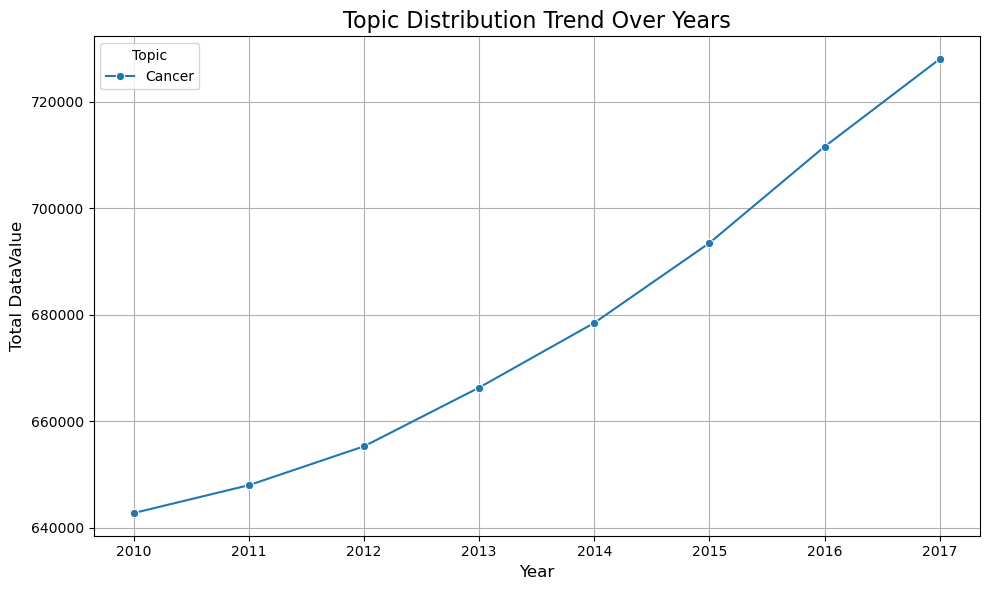

In [59]:
# Step 2: Aggregating data by Topic and Year
df_grouped = temp1.groupby(['Year', 'Topic'])['NormalizedDataValue'].sum().reset_index()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='NormalizedDataValue', hue='Topic', marker='o')

# Adding labels and title
plt.title('Topic Distribution Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total DataValue', fontsize=12)
plt.legend(title='Topic', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [60]:
temp1 = temp1[['Year', 'DataSource', 'Topic', 'Question', 'NormalizedDataValue']]


In [61]:
temp1

,Year,DataSource,Topic,Question,NormalizedDataValue
373,2010,Death Certificate,Cancer,"Cancer of the prostate, mortality",13.0
706,2016,Death Certificate,Cancer,"Cancer of the female cervix, mortality",411.0
753,2010,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",210.0
754,2012,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",5248.0
755,2013,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",5387.0
...,...,...,...,...,...
217299,2011,Death Certificate,Cancer,"Melanoma, mortality",11.0
217550,2010,Death Certificate,Cancer,"Melanoma, mortality",366.0
217624,2013,Death Certificate,Cancer,"Melanoma, mortality",358.0
217648,2012,Death Certificate,Cancer,"Melanoma, mortality",0.0


In [62]:
temp2 = df_stats[df_stats['YearStart'] == df_stats['YearEnd']]
temp2

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
89,2014,2014,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1460.0,1460.0
90,2015,2015,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,2496.0,2496.0
91,2016,2016,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,3880.0,3880.0
92,2019,2019,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1711.0,1711.0
244,2012,2012,NVSS,Asthma,Asthma mortality rate,NaN,Number,84.0,84.0
...,...,...,...,...,...,...,...,...,...
1090252,2016,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,3.5,3.5
1090265,2020,2020,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.5,2.5
1090285,2020,2020,BRFSS,Alcohol,Binge drinking intensity among adults aged >= ...,Number,Mean,0.0,0.0
1090299,2016,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1


In [63]:
temp2 = temp2.rename(columns={'YearStart': 'Year'}).drop(['YearEnd'], axis=1)
temp2

,Year,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,NormalizedDataValue
89,2014,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1460.0,1460.0
90,2015,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,2496.0,2496.0
91,2016,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,3880.0,3880.0
92,2019,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,1711.0,1711.0
244,2012,NVSS,Asthma,Asthma mortality rate,NaN,Number,84.0,84.0
...,...,...,...,...,...,...,...,...
1090252,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,3.5,3.5
1090265,2020,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.5,2.5
1090285,2020,BRFSS,Alcohol,Binge drinking intensity among adults aged >= ...,Number,Mean,0.0,0.0
1090299,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1


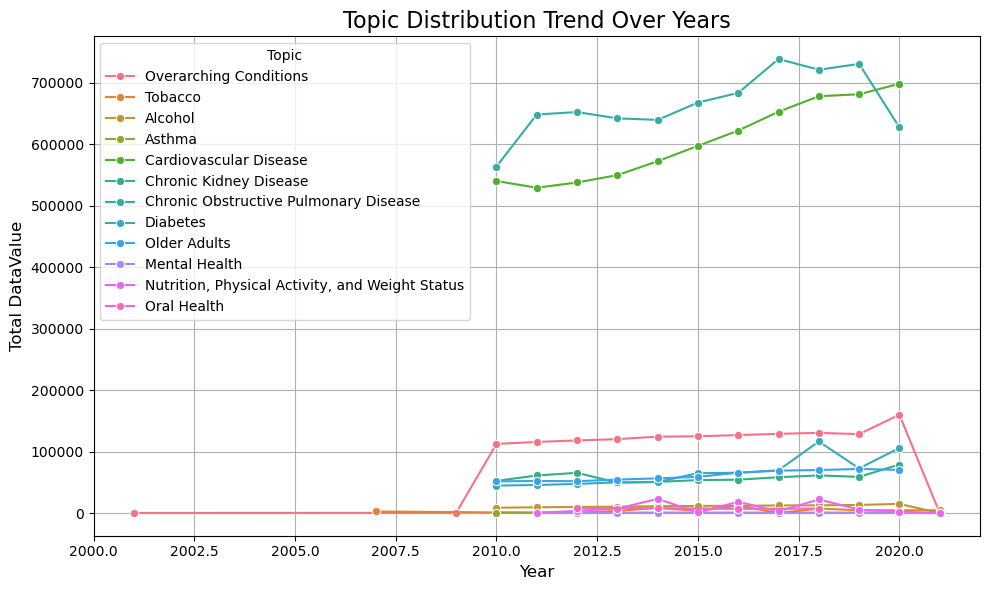

In [64]:
# Step 2: Aggregating data by Topic and Year
df_grouped = temp2.groupby(['Year', 'Topic'])['NormalizedDataValue'].sum().reset_index()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='NormalizedDataValue', hue='Topic', marker='o')

# Adding labels and title
plt.title('Topic Distribution Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total DataValue', fontsize=12)
plt.legend(title='Topic', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [65]:
temp2 = temp2[['Year', 'DataSource', 'Topic', 'Question', 'NormalizedDataValue']]
temp2

,Year,DataSource,Topic,Question,NormalizedDataValue
89,2014,NVSS,Alcohol,Chronic liver disease mortality,1460.0
90,2015,NVSS,Alcohol,Chronic liver disease mortality,2496.0
91,2016,NVSS,Alcohol,Chronic liver disease mortality,3880.0
92,2019,NVSS,Alcohol,Chronic liver disease mortality,1711.0
244,2012,NVSS,Asthma,Asthma mortality rate,84.0
...,...,...,...,...,...
1090252,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,3.5
1090265,2020,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,2.5
1090285,2020,BRFSS,Alcohol,Binge drinking intensity among adults aged >= ...,0.0
1090299,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,4.1


In [66]:
df_stats =pd.concat([temp1, temp2], axis=0, ignore_index=True)
df_stats

,Year,DataSource,Topic,Question,NormalizedDataValue
0,2010,Death Certificate,Cancer,"Cancer of the prostate, mortality",13.0
1,2016,Death Certificate,Cancer,"Cancer of the female cervix, mortality",411.0
2,2010,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",210.0
3,2012,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",5248.0
4,2013,Statewide central cancer registries,Cancer,"Cancer of the colon and rectum (colorectal), i...",5387.0
...,...,...,...,...,...
3622,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,3.5
3623,2020,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,2.5
3624,2020,BRFSS,Alcohol,Binge drinking intensity among adults aged >= ...,0.0
3625,2016,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,4.1


In [67]:
pivot_df = df_stats.pivot_table(
    index=['DataSource', 'Topic', 'Year'],  # Keep 'DataSource', 'Topic', and 'Year'
    columns='Question',  # Pivot 'Question' to columns
    values='NormalizedDataValue',  # Use 'DataValue' as the values
    aggfunc='first'  # If there are multiple values, choose the first
)

pivot_df.columns = pivot_df.columns.astype(str)  # Convert columns to string for easier handling
pivot_df = pivot_df.reset_index().fillna(0)
pivot_df

Question,DataSource,Topic,Year,Amputation of a lower extremity attributable to diabetes,Asthma mortality rate,Binge drinking frequency among adults aged >= 18 years who binge drink,Binge drinking intensity among adults aged >= 18 years who binge drink,"Cancer of the colon and rectum (colorectal), incidence","Cancer of the colon and rectum (colorectal), mortality","Cancer of the female breast, mortality","Cancer of the female cervix, mortality","Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality","Cancer of the oral cavity and pharynx, mortality","Cancer of the prostate, mortality",Census tracts with healthier food retailers within � mile of boundary,Chronic liver disease mortality,Emergency department visit rate for asthma,Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis,Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis,Farmers markets that accept Supplemental Nutrition Assistance Program (SNAP) benefits,Farmers markets that accept Women and Infant Children (WIC) farmers market nutrition program coupons,Gini Index of income inequality,Hospitalization for acute myocardial infarction,Hospitalization for chronic obstructive pulmonary disease as any diagnosis,Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis,Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Hospitalization for stroke,Hospitalization with diabetes as a listed diagnosis,Hospitalizations for asthma,Incidence of treated end-stage renal disease,Incidence of treated end-stage renal disease attributed to diabetes,"Invasive cancer (all sites combined), incidence","Invasive cancer (all sites combined), mortality","Invasive cancer of the cervix, incidence","Invasive cancer of the female breast, incidence","Invasive cancer of the oral cavity or pharynx, incidence","Invasive cancer of the prostate, incidence","Invasive melanoma, incidence",Life expectancy at age 65 years,Life expectancy at birth,Live births occurring at Baby Friendly Facilities,Mean maternity practices in infant nutrition care (mPINC) score,Median daily frequency of fruit consumption among adults aged >= 18 years,Median daily frequency of fruit consumption among high school students,Median daily frequency of vegetable consumption among adults aged >= 18 years,Median daily frequency of vegetable consumption among high school students,"Melanoma, mortality",Mortality due to diabetes reported as any listed cause of death,Mortality from cerebrovascular disease (stroke),Mortality from coronary heart disease,Mortality from diseases of the heart,Mortality from heart failure,Mortality from total cardiovascular diseases,Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years,Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years,Mortality with diabetic ketoacidosis reported as any listed cause of death,Mortality with end-stage renal disease,"Number of farmers markets per 100,000 residents",Percent tobacco revenue to fund at CDC recommended level,Population served by community water systems that receive fluoridated drinking water,Premature mortality among adults aged 45-64 years,"Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars",Recent activity limitation among adults aged >= 18 years,Recent mentally unhealthy days among adults aged >= 18 years,Recent physic

In [69]:
columns_all_zero = pivot_df.columns[(pivot_df == 0).all()]
print(columns_all_zero)

Index(['Amputation of a lower extremity attributable to diabetes',
       'Emergency department visit rate for asthma',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for acute myocardial infarction',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for stroke',
       'Hospitalization with diabetes as a listed diagnosis',
       'Hospitalizations for asthma'],
      dtype='object', name='Question')


In [70]:
df_stats = pivot_df.copy()
df_stats = df_stats.drop(['Amputation of a lower extremity attributable to diabetes',
       'Emergency department visit rate for asthma',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for acute myocardial infarction',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for stroke',
       'Hospitalization with diabetes as a listed diagnosis',
       'Hospitalizations for asthma'],axis=1)

In [71]:
df_stats

Question,DataSource,Topic,Year,Asthma mortality rate,Binge drinking frequency among adults aged >= 18 years who binge drink,Binge drinking intensity among adults aged >= 18 years who binge drink,"Cancer of the colon and rectum (colorectal), incidence","Cancer of the colon and rectum (colorectal), mortality","Cancer of the female breast, mortality","Cancer of the female cervix, mortality","Cancer of the lung and bronchus, incidence","Cancer of the lung and bronchus, mortality","Cancer of the oral cavity and pharynx, mortality","Cancer of the prostate, mortality",Census tracts with healthier food retailers within � mile of boundary,Chronic liver disease mortality,Farmers markets that accept Supplemental Nutrition Assistance Program (SNAP) benefits,Farmers markets that accept Women and Infant Children (WIC) farmers market nutrition program coupons,Gini Index of income inequality,Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years,Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Incidence of treated end-stage renal disease,Incidence of treated end-stage renal disease attributed to diabetes,"Invasive cancer (all sites combined), incidence","Invasive cancer (all sites combined), mortality","Invasive cancer of the cervix, incidence","Invasive cancer of the female breast, incidence","Invasive cancer of the oral cavity or pharynx, incidence","Invasive cancer of the prostate, incidence","Invasive melanoma, incidence",Life expectancy at age 65 years,Life expectancy at birth,Live births occurring at Baby Friendly Facilities,Mean maternity practices in infant nutrition care (mPINC) score,Median daily frequency of fruit consumption among adults aged >= 18 years,Median daily frequency of fruit consumption among high school students,Median daily frequency of vegetable consumption among adults aged >= 18 years,Median daily frequency of vegetable consumption among high school students,"Melanoma, mortality",Mortality due to diabetes reported as any listed cause of death,Mortality from cerebrovascular disease (stroke),Mortality from coronary heart disease,Mortality from diseases of the heart,Mortality from heart failure,Mortality from total cardiovascular diseases,Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years,Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years,Mortality with diabetic ketoacidosis reported as any listed cause of death,Mortality with end-stage renal disease,"Number of farmers markets per 100,000 residents",Percent tobacco revenue to fund at CDC recommended level,Population served by community water systems that receive fluoridated drinking water,Premature mortality among adults aged 45-64 years,"Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars",Recent activity limitation among adults aged >= 18 years,Recent mentally unhealthy days among adults aged >= 18 years,Recent physically unhealthy days among adults aged >= 18 years,Sale of cigarette packs,Secondary schools that allow community-sponsored use of physical activity facilities by youth outside of normal school hours,Secondary schools that allow students to purchase soda or fruit drinks,Secondary schools that allow students to purchase sports drinks,Secondary schools that have a comprehensive tobacco-free school policy in place,Secondary schools that offer less healthy foods as competitive foods
0,ACS 5-Year Estimates,Overarching Conditions,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47,0.0,0.

In [72]:
df_stats.to_csv('CDI/StatisticsOfHealth.csv')

#### Demographics

In [73]:
df_dem

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue
218989,2017,2017,USRDS,Chronic Kidney Disease,Incidence of treated end-stage renal disease,"cases per 1,000,000","Adjusted by age, sex, race and ethnicity",436.0
220047,2018,2018,USRDS,Chronic Kidney Disease,Incidence of treated end-stage renal disease,"cases per 1,000,000","Adjusted by age, sex, race and ethnicity",439.6
221353,2014,2014,USRDS,Chronic Kidney Disease,Incidence of treated end-stage renal disease a...,"cases per 1,000,000","Adjusted by age, sex, race and ethnicity",201.4
221365,2012,2012,USRDS,Chronic Kidney Disease,Incidence of treated end-stage renal disease,"cases per 1,000,000","Adjusted by age, sex, race and ethnicity",397.5
221665,2018,2018,USRDS,Chronic Kidney Disease,Incidence of treated end-stage renal disease a...,"cases per 1,000,000","Adjusted by age, sex, race and ethnicity",226.2
...,...,...,...,...,...,...,...,...
1090248,2012,2012,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Age-adjusted Mean,3.8
1090287,2017,2017,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Age-adjusted Mean,3.8
1090297,2012,2012,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Age-adjusted Mean,3.6
1090311,2020,2020,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Age-adjusted Mean,3.0


In [74]:
print(df_dem['Topic'].unique().tolist())
print(df_dem['DataValueUnit'].unique().tolist())
print(df_dem['DataValueType'].unique().tolist())


['Chronic Kidney Disease', 'Alcohol', 'Overarching Conditions', 'Mental Health']
['cases per 1,000,000', 'Number']
['Adjusted by age, sex, race and ethnicity', 'Age-adjusted Mean']


In [ ]:
dems_pivot = df_dem.groupby(['DataSource', 'Topic','Question', 'DataValueType'])[['DataValue']].agg(set).reset_index()

dems_pivot

In [ ]:
print(df_dem['Question'].unique().tolist())
print(df_dem['Topic'].unique().tolist())
print(df_dem['DataValueType'].unique().tolist())

In [ ]:
#df_stats = df_prev.drop(['DataValueUnit', 'DataValueType'], axis=1)


### Binary

In [ ]:
df_bin

In [ ]:
print(df_bin['Question'].unique().tolist())
print(df_bin['DataValueType'].unique().tolist())
print(df_bin['DataValue'].unique().tolist())


question_map = {
    'Local authority to regulate alcohol outlet density': 'Alcohol Regulations',
    'Commercial host (dram shop) liability laws': 'Alcohol Regulations',
    'Presence of regulations pertaining to screen time in early care and education settings': 'Early Care and Education Regulations',
    'Presence of regulations pertaining to serving fruit in early care and education settings': 'Early Care and Education Regulations',
    'Presence of regulations pertaining to serving vegetables in early care and education settings': 'Early Care and Education Regulations',
    'Presence of regulations pertaining to avoiding sugar in early care and education settings': 'Early Care and Education Regulations',
    'State child care regulation supports onsite breastfeeding': 'Early Care and Education Regulations',
    'Amount of tobacco product excise tax': 'Tobacco Regulations',
    'States with strong polices that require retail licenses to sell tobacco products': 'Tobacco Regulations',
    'States that allow stronger local tobacco control and prevention laws': 'Tobacco Regulations'
}
value_map = {
    'Category 4 - State had mixed alcohol retail licensing policies' : 'mixed alcohol retail license',
    'Category 2 - State had commercial host liability with major limitations': 'commercial host liability',
    'No': '0', 
    'Yes': '1'

}
df_bin['Question'] = df_bin['Question'].map(question_map)
df_bin['DataValue'] = df_bin['DataValue'].map(value_map)

df_bin

In [ ]:
df_bin = df_bin.drop(['YearStart', 'DataSource', 'Topic', 'DataValueUnit'], axis=1)
df_bin

In [ ]:
df_sorted = df_bin.sort_values(by='YearEnd').drop_duplicates()
df_sorted

#### Monetary

In [ ]:
df_money

In [ ]:
df_grouped_money = df_money.groupby(['YearStart', 'Question'])['DataValue'].sum().reset_index()
df_grouped_money['Question'] = df_grouped_money['Question'].replace({
    'Amount of alcohol excise tax by beverage type (beer)': 'Alcohol Excise Tax (Beer)',
    'Amount of alcohol excise tax by beverage type (distilled spirits)': 'Alcohol Excise Tax (Distilled Spirits)',
    'Amount of alcohol excise tax by beverage type (wine)': 'Alcohol Excise Tax (Wine)'
})
df_grouped_money

In [ ]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_money, x='YearStart', y='DataValue', hue='Question', marker='o')

# Customize plot
plt.title('Alcohol Excise Tax across Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tax', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
df_grouped_money